<a href="https://colab.research.google.com/github/a-kas-h/-ConsultancyBeta-A/blob/main/YOLO_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Check which GPU. Should be T4

In [ ]:
!nvidia-smi

## Unzipping the data folder

In [13]:
!unzip -q /content/data.zip -d /content
!mv /content/data /content/custom_data

## The following script splits the dataset into training data and validation data. By EdjeElectronics

In [14]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2025-07-23 18:57:57--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-07-23 18:57:58 (55.5 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 4953
Number of annotation files: 4953
Images moving to train: 4457
Images moving to validation: 496


## ultralytics install:

In [15]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

## Following code
1. Reads classes.txt to get list of class names
2. Creates data dictionary with correct paths to folders, number and names of classes
3. Writes data in YAML format to data.yaml

In [17]:
import yaml
import os

def create_data_yaml(class_path, data_path):
  if not os.path.exists(class_path):
    print("Class file does not exist")
    return
  with open(class_path, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip())==0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'val/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write to YAML
  with open(data_path, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created {data_path}')
  return

# Define path to classes and run function
class_path = '/content/custom_data/classes.txt'
data_path = '/content/data.yaml'

create_data_yaml(class_path, data_path)

#Check
!cat /content/data.yaml

Created /content/data.yaml
path: /content/data
train: train/images
val: val/images
nc: 80
names:
- person
- bicycle
- car
- motorcycle
- airplane
- bus
- train
- truck
- boat
- traffic light
- fire hydrant
- stop sign
- parking meter
- bench
- bird
- cat
- dog
- horse
- sheep
- cow
- elephant
- bear
- zebra
- giraffe
- backpack
- umbrella
- handbag
- tie
- suitcase
- frisbee
- skis
- snowboard
- sports ball
- kite
- baseball bat
- baseball glove
- skateboard
- surfboard
- tennis racket
- bottle
- wine glass
- cup
- fork
- knife
- spoon
- bowl
- banana
- apple
- sandwich
- orange
- broccoli
- carrot
- hot dog
- pizza
- donut
- cake
- chair
- couch
- potted plant
- bed
- dining table
- toilet
- tv
- laptop
- mouse
- remote
- keyboard
- cell phone
- microwave
- oven
- toaster
- sink
- refrigerator
- book
- clock
- vase
- scissors
- teddy bear
- hair drier
- toothbrush


In [20]:
mv /content/data/validation /content/data/val

## Code for Training model:
- 40 Epochs
- 640*640 default resolution
- model is yolov8

In [21]:
!yolo detect train data = /content/data.yaml model=yolov8s.pt epochs=40 imgsz=640

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

## Test:

In [24]:
!yolo detect predict model = runs/detect/train2/weights/best.pt source = data/val/images save=True

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/496 /content/data/val/images/000000001268.jpg: 448x640 4 persons, 1 bird, 1 handbag, 2 cell phones, 44.4ms
image 2/496 /content/data/val/images/000000002473.jpg: 448x640 4 persons, 1 skis, 35.6ms
image 3/496 /content/data/val/images/000000003501.jpg: 640x640 1 bowl, 2 broccolis, 17.1ms
image 4/496 /content/data/val/images/000000005992.jpg: 448x640 5 sheeps, 14.0ms
image 5/496 /content/data/val/images/000000009483.jpg: 480x640 2 persons, 1 chair, 1 tv, 1 laptop, 1 mouse, 1 keyboard, 41.9ms
image 6/496 /content/data/val/images/000000009769.jpg: 480x640 2 persons, 1 car, 1 truck, 1 fire hydrant, 13.3ms
image 7/496 /content/data/val/images/000000009891.jpg: 480x640 2 persons, 2 cars, 3 backpacks, 2 handbags, 2 suitcases, 13.3ms
image 8/496 /content/data/val/images/000000010995.jpg: 480x640 1 bed, 12.5ms
image 9/496 /co

## Display:

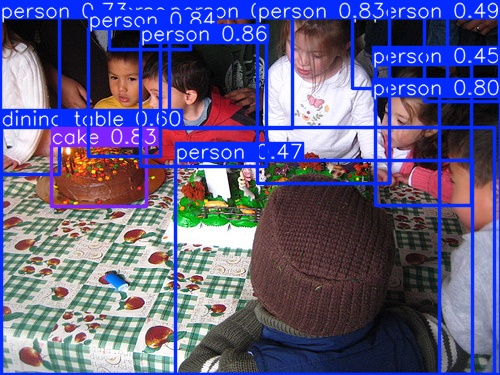

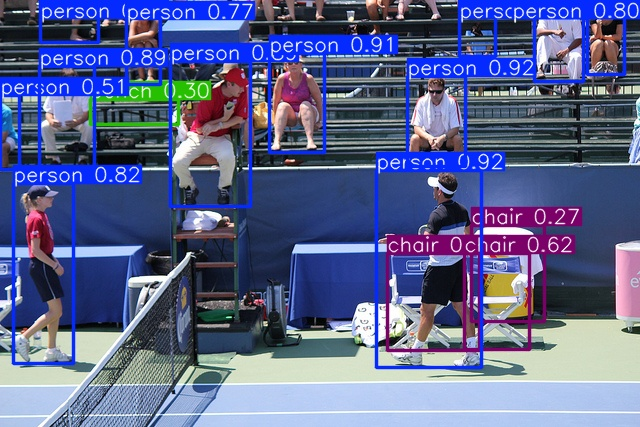

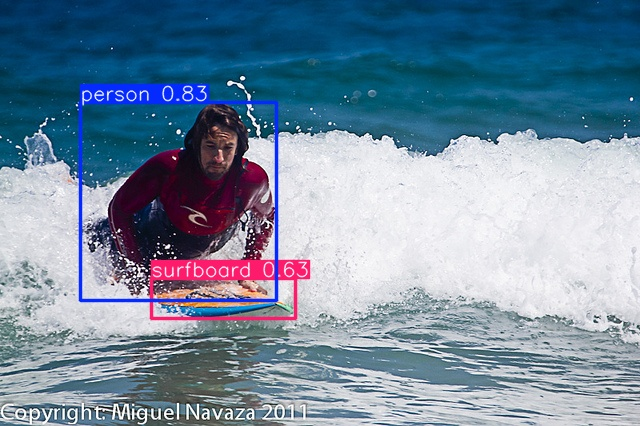

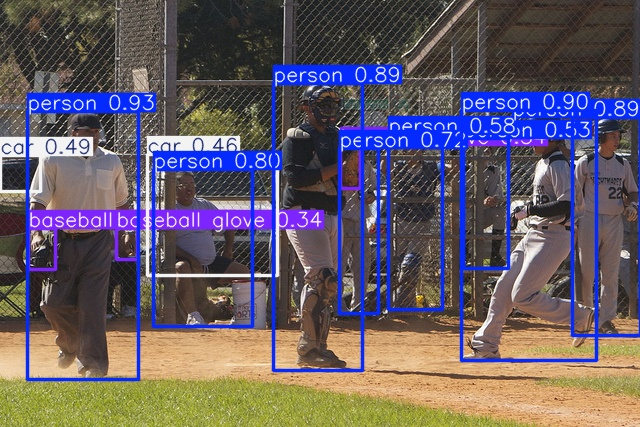

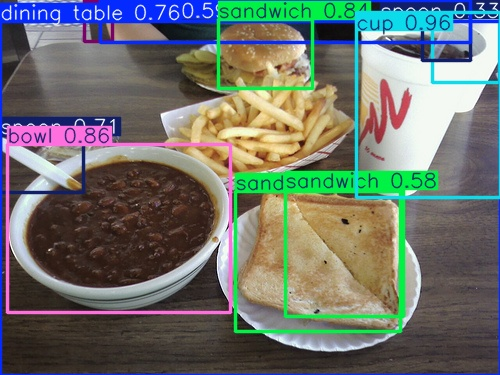

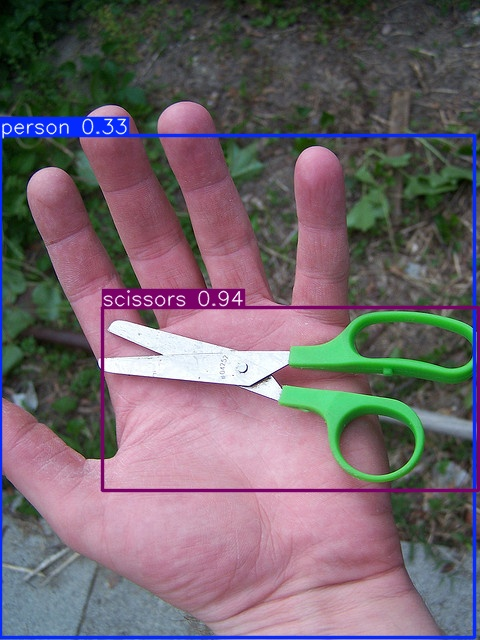

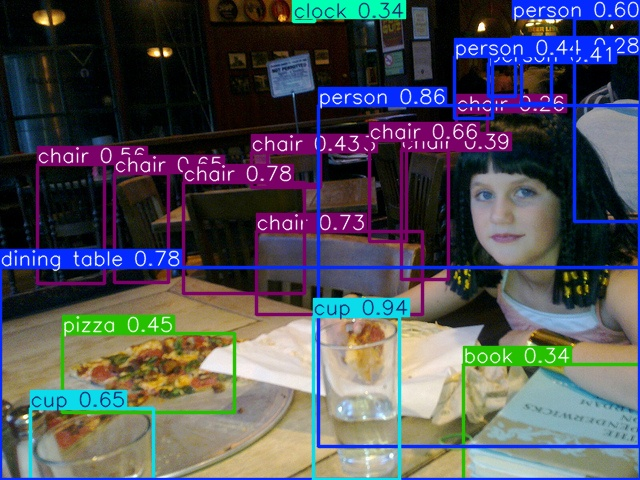

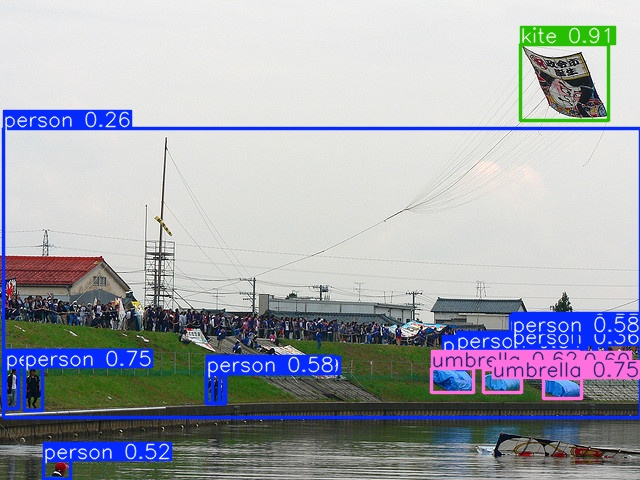

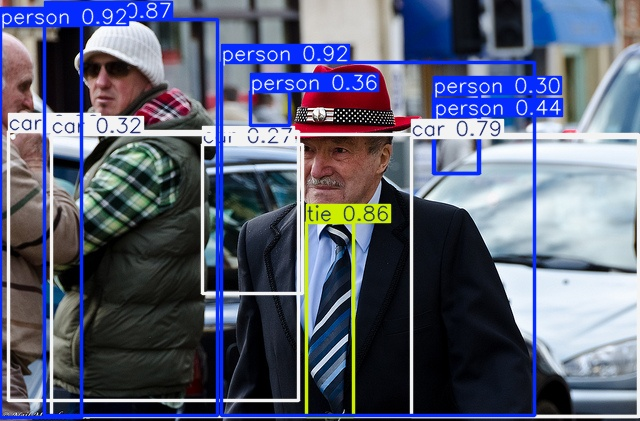

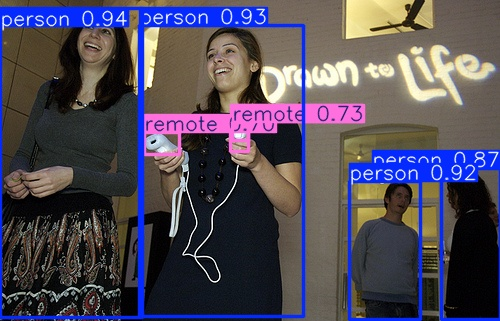

In [25]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename = image_path, height = 400))
  print('\n')